In [1]:
using Revise, SLAM, Plots

In [7]:
θ = π / 4
R_gt =[cos(θ) -sin(θ) ; sin(θ) cos(θ)]
t_gt = [-2, 5]

# gen points
n = 30
unmoved = Pt[]
moved = Pt[]
xs = collect(range(0, n))
for i in 1:30
    y = 0.2 * xs[i] * sin(0.5 * xs[i])
    push!(moved, R_gt * [xs[i], y] + t_gt)
    push!(unmoved, Pt([xs[i], y]))
end

P = moved;
Q = unmoved;

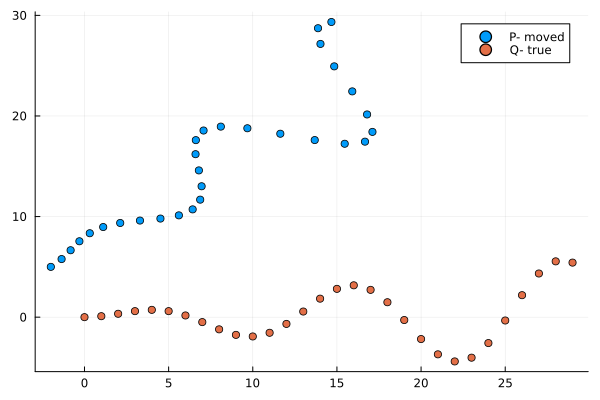

In [11]:
function plot_scans(P, Q)
    pxs = Float64[]
    pys = Float64[]
    for pt in P
        push!(pxs, pt.x)
        push!(pys, pt.y)
    end
    qxs = Float64[]
    qys = Float64[]
    for pt in Q
        push!(qxs, pt.x)
        push!(qys, pt.y)
    end
    
    scatter(pxs, pys, label="P- moved")
    scatter!(qxs, qys, label="Q- true")

end
plot_scans(P, Q)

In [15]:
centeredP, centerP = center_scan(P);
centeredQ, centerQ = center_scan(Q);

(StaticArraysCore.SVector{2, Float64}[[-14.5, -0.2501959536449814], [-13.5, -0.15431084592414077], [-12.5, 0.08639244027817727], [-11.5, 0.3483010383174514], [-10.5, 0.47724198781556404], [-9.5, 0.34827619045897507], [-8.5, -0.08085194397314069], [-7.5, -0.7412924724104493], [-6.5, -1.4610799461376667], [-5.5, -2.0097501654421563]  …  [5.5, -2.4262803972024605], [6.5, -3.9449181455259956], [7.5, -4.650152862468077], [8.5, -4.277275957211753], [9.5, -2.8257459600470693], [10.5, -0.5818054404009848], [11.5, 1.9346726378535513], [12.5, 4.090239949733772], [13.5, 5.297205238246293], [14.5, 5.172195368398181]], [14.5, 0.2501959536449814])

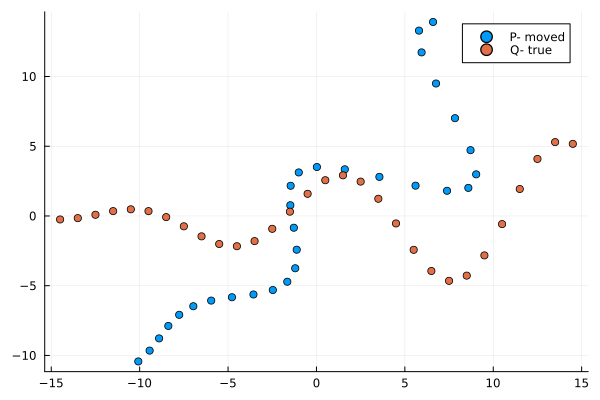

In [16]:
plot_scans(centeredP, centeredQ)

In [22]:
idxs = correspondence_idxs(centeredP, centeredQ)

30-element Vector{Tuple{Int64, Int64}}:
 (1, 10)
 (2, 10)
 (3, 10)
 (4, 10)
 (5, 10)
 (6, 10)
 (7, 10)
 (8, 11)
 (9, 11)
 (10, 12)
 ⋮
 (22, 20)
 (23, 27)
 (24, 27)
 (25, 28)
 (26, 28)
 (27, 28)
 (28, 17)
 (29, 29)
 (30, 29)

In [24]:
cov, _ = cross_covariance(centeredP, centeredQ, idxs)

([1113.9727460470756 1153.7187012181823; 367.3994855621959 478.8189039605895], Int64[])

In [26]:
using LinearAlgebra

F = svd(cov)

R_calc = F.U * F.Vt
t_calc = centerQ - R_calc * centerP

display(R_calc)
display(t_calc)

2×2 StaticArraysCore.SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
  0.896685  0.44267
 -0.44267   0.896685

2-element StaticArraysCore.SVector{2, Float64} with indices SOneTo(2):
   0.4278781961137348
 -10.010558867093492

In [27]:
new_P = Pt[]
for pt in P
    new_pt = R_calc * pt  + t_calc
    push!(new_P, new_pt)
end

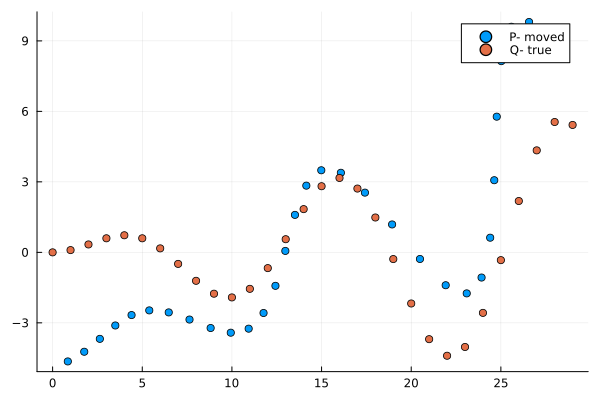

In [28]:
plot_scans(new_P, Q)

In [39]:
odom_mtx, icp_P = icp_svd(P, Q)

([0.9999999999999999 -4.163336342344337e-17 3.552713678800501e-15; 2.7755575615628914e-17 1.0000000000000002 -4.996003610813204e-16; 0.0 0.0 1.0], StaticArraysCore.SVector{2, Float64}[[7.425917519787717e-15, -2.4980018054066086e-16], [1.000000000000006, 0.09588510772084073], [2.000000000000005, 0.3365883939231592], [3.0000000000000058, 0.5984969919624332], [4.0000000000000036, 0.7274379414605463], [5.000000000000003, 0.5984721441039562], [6.0000000000000036, 0.16934400967184124], [7.0000000000000036, -0.4910965187654673], [8.0, -1.2108839924926862], [8.999999999999998, -1.7595542117971754]  …  [19.999999999999986, -2.1760844435574795], [20.99999999999999, -3.6947221918810147], [21.999999999999996, -4.399956908823096], [22.99999999999999, -4.027080003566772], [23.999999999999996, -2.5755500064020898], [24.99999999999999, -0.33160948675600294], [25.99999999999999, 2.1848685914985335], [26.999999999999982, 4.340435903378753], [27.999999999999975, 5.547401191891273], [28.999999999999993, 5

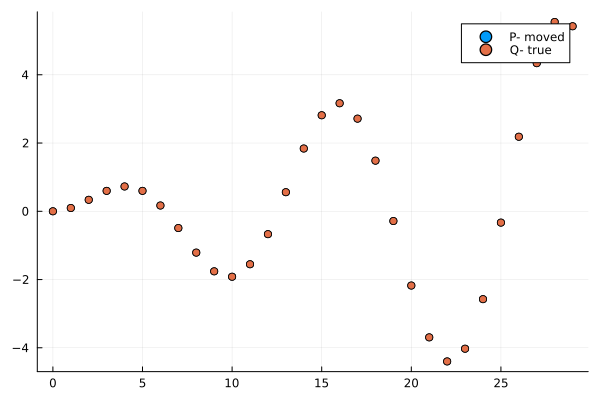

In [40]:
plot_scans(icp_P, Q)

In [35]:
""" What makes sense as a good norm over the scan?
    1) sum of the norms of diff of each pt
    2) 
"""
function norm_scans(P, Q)
    total = 0.
    for p in P, q in Q
        total += sum((p - q).^2)
    end
    sqrt(total)
end

norm_scans

In [36]:
norm_scans(P, Q)

624.9568645023452

In [37]:
norm_scans(new_P, Q)

382.163331658602